# Modeling

In [136]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMAResults
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

## Load dataframes

In [94]:
uptown = pd.read_csv('../data/uptown.csv').set_index('Unnamed: 0')
uptown.index.name = None

lgd = pd.read_csv('../data/lgd.csv').set_index('Unnamed: 0')
lgd.index.name = None

audubon = pd.read_csv('../data/audubon.csv').set_index('Unnamed: 0')
audubon.index.name = None

metairie = pd.read_csv('../data/metairie.csv').set_index('Unnamed: 0')
metairie.index.name = None

aurora = pd.read_csv('../data/aurora.csv').set_index('Unnamed: 0')
aurora.index.name = None

In [95]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [96]:
get_df_name(uptown)

'uptown'

In [97]:
def rolling_mean_subtraction(df, window):
    roll_mean = df.rolling(window=window).mean()
    df_minus_roll_mean = df - roll_mean
    df_minus_roll_mean.dropna(inplace=True)
    
    dftest = adfuller(df_minus_roll_mean)
    p_val = dftest[1]
    
    return (f"p-value: {round(dftest[1], 3)} for window of {window}")

### Rolling mean windows to make dataframes stationary

- Uptown: 2
- LGD: 3
- Audubon: 2
- Metairie: 5
- Aurora: 5

## Add rolling mean dfs to notebook

In [98]:
uptown_minus_roll_mean = uptown - uptown.rolling(window=2).mean()
uptown_minus_roll_mean.dropna(inplace=True)

In [99]:
lgd_minus_roll_mean = lgd - lgd.rolling(window=3).mean()
lgd_minus_roll_mean.dropna(inplace=True)

In [100]:
audubon_minus_roll_mean = audubon - audubon.rolling(window=2).mean()
audubon_minus_roll_mean.dropna(inplace=True)

In [101]:
metairie_minus_roll_mean = metairie - metairie.rolling(window=5).mean()
metairie_minus_roll_mean.dropna(inplace=True)

In [102]:
aurora_minus_roll_mean = aurora - aurora.rolling(window=5).mean()
aurora_minus_roll_mean.dropna(inplace=True)

In [103]:
aurora_minus_roll_mean.head()

,70131
1996-08-01,1800.0
1996-09-01,1620.0
1996-10-01,1420.0
1996-11-01,1200.0
1996-12-01,1000.0


## Differencing periods that make each dataframe stationary

- Uptown: 1
- LGD: 2
- Audubon: 1
- Metairie: 2
- Aurora: 3

# Initial Modeling - Uptown

In [104]:
uptown_arma = ARMA(uptown.diff(1).dropna(), order=(1,0))
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4533.65
BIC: 4544.38


In [105]:
uptown_arma = ARMA(uptown.diff(1).dropna(), order=(2,1))
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4392.3
BIC: 4410.18


In [106]:
uptown_arma = ARMA(uptown.diff(1).dropna(), order=(1,1))
res_arma = uptown_arma.fit()

print(f"AIC: {round(res_arma.aic, 2)}")
print(f"BIC: {round(res_arma.bic, 2)}")

AIC: 4391.0
BIC: 4405.3


## ARIMA Modeling - Uptown

### ARIMA Manual

In [107]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# print(pdq)

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2]) for x in pdq]

pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [108]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
lowest_aic = 10000
for comb in pdq:
    try:
        uptown_arima = sm.tsa.ARIMA(uptown, order=comb)
        output = uptown_arima.fit()
        ans.append([comb, output.aic])
        print('ARIMA {}: AIC Calculated = {}'.format(comb, round(output.aic, 2)))
        if output.aic < lowest_aic:
            lowest_aic = output.aic
    except:
        continue
        
print(round(lowest_aic, 4))

ARIMA (0, 0, 0): AIC Calculated = 6935.87
ARIMA (0, 0, 1): AIC Calculated = 6580.2
ARIMA (0, 1, 0): AIC Calculated = 4986.34
ARIMA (0, 1, 1): AIC Calculated = 4664.73
ARIMA (0, 2, 0): AIC Calculated = 4522.06
ARIMA (0, 2, 1): AIC Calculated = 4391.21
ARIMA (1, 0, 0): AIC Calculated = 5101.2
ARIMA (1, 1, 0): AIC Calculated = 4533.65
ARIMA (1, 1, 1): AIC Calculated = 4391.0
ARIMA (1, 2, 0): AIC Calculated = 4496.6
ARIMA (1, 2, 1): AIC Calculated = 4392.77
ARIMA (2, 0, 0): AIC Calculated = 4562.55
ARIMA (2, 0, 1): AIC Calculated = 4424.01
ARIMA (2, 1, 0): AIC Calculated = 4496.67
ARIMA (2, 1, 1): AIC Calculated = 4392.3
ARIMA (2, 2, 0): AIC Calculated = 4383.29
ARIMA (2, 2, 1): AIC Calculated = 4341.93
ARIMA (2, 2, 2): AIC Calculated = 4343.88
4341.9276


### Auto ARIMA

#### Train test split

In [109]:
len(uptown)

265

In [110]:
265/5

53.0

In [111]:
265 - 53

212

In [112]:
uptown_train = uptown.iloc[0:212]
uptown_test = uptown.iloc[212:]

In [113]:
uptown_train.tail()

,70115
2013-07-01,366800.0
2013-08-01,366800.0
2013-09-01,368700.0
2013-10-01,370900.0
2013-11-01,372500.0


In [114]:
uptown_test.head()

,70115
2013-12-01,374100.0
2014-01-01,375900.0
2014-02-01,377600.0
2014-03-01,378200.0
2014-04-01,376900.0


In [115]:
len(uptown_train) + len(uptown_test) == 265

True

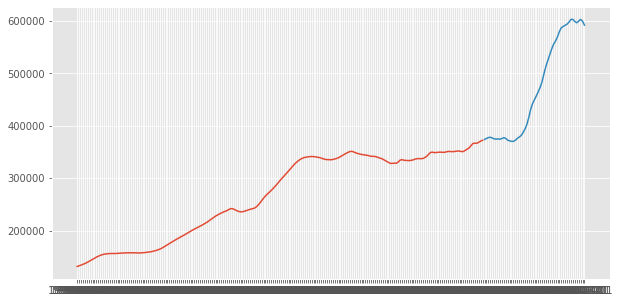

In [116]:
fig = plt.figure(figsize=(10,5))
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

Because the training set stops just as the test sets starts a sharp uptick, I'm going make the training set longer.

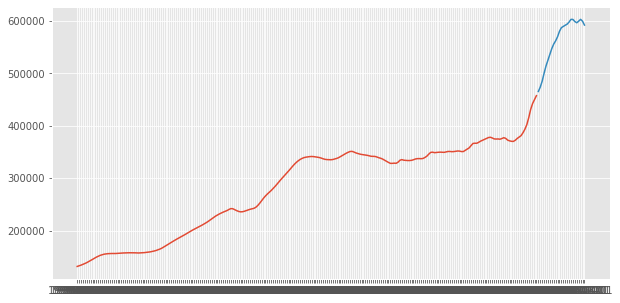

In [117]:
fig = plt.figure(figsize=(10,5))
uptown_train = uptown.iloc[0:240]
uptown_test = uptown.iloc[240:]
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

... a little more...

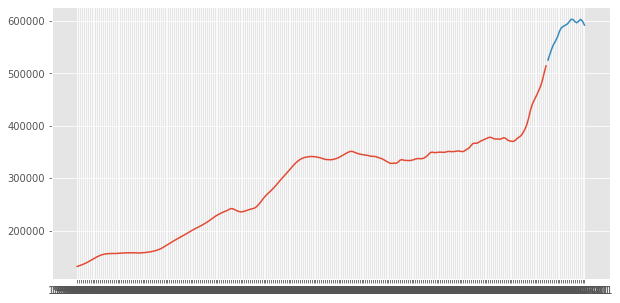

In [118]:
fig = plt.figure(figsize=(10,5))
uptown_train = uptown.iloc[0:245]
uptown_test = uptown.iloc[245:]
plt.plot(uptown_train)
plt.plot(uptown_test)
plt.show()

#### Run Auto ARIMA

In [119]:
uptown_auto_arima = auto_arima(uptown_train,
                               start_p=0, d=None, start_q=0,
                               max_p=4, max_d=5, max_q=5,
                               suppress_warnings=True, trace=True, stepwise=True, n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4551.241, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4554.671, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4532.699, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4620.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4500.457, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4508.201, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4506.038, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4524.660, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4540.518, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4516.673, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.116 seconds


Here my minimum AIC is 4500.457 for (1,1,1)

#### Compare with manual ARIMA on train set only

In [120]:
ans = []
lowest_aic = 10000
for comb in pdq:
    try:
        uptown_arima_train = sm.tsa.ARIMA(uptown_train, order=comb)
        output = uptown_arima_train.fit()
        ans.append([comb, output.aic])
        print('ARIMA {}: AIC Calculated = {}'.format(comb, round(output.aic, 2)))
        if output.aic < lowest_aic:
            lowest_aic = output.aic
    except:
        continue
        
print(round(lowest_aic, 4))

ARIMA (0, 0, 0): AIC Calculated = 6282.55
ARIMA (0, 0, 1): AIC Calculated = 5955.41
ARIMA (0, 0, 2): AIC Calculated = 5640.17
ARIMA (0, 1, 0): AIC Calculated = 4551.24
ARIMA (0, 1, 1): AIC Calculated = 4254.85
ARIMA (0, 2, 0): AIC Calculated = 4047.19
ARIMA (0, 2, 1): AIC Calculated = 3949.24
ARIMA (0, 2, 2): AIC Calculated = 3948.95
ARIMA (1, 0, 0): AIC Calculated = 4651.58
ARIMA (1, 1, 0): AIC Calculated = 4066.52
ARIMA (1, 1, 1): AIC Calculated = 3958.04
ARIMA (1, 1, 2): AIC Calculated = 3947.9
ARIMA (1, 2, 0): AIC Calculated = 4023.04
ARIMA (1, 2, 1): AIC Calculated = 3950.55
ARIMA (1, 2, 2): AIC Calculated = 3939.84
ARIMA (2, 0, 0): AIC Calculated = 4109.41
ARIMA (2, 1, 0): AIC Calculated = 4032.58
ARIMA (2, 1, 1): AIC Calculated = 3959.77
ARIMA (2, 1, 2): AIC Calculated = 3959.03
ARIMA (2, 2, 0): AIC Calculated = 3965.28
ARIMA (2, 2, 1): AIC Calculated = 3922.33
ARIMA (2, 2, 2): AIC Calculated = 3896.31
3896.3092


- Here my lowest AIC is 3896 which is ARIMA (2,2,2)
- Compared to the lowest AIC in autoARIMA, manual ARIMA (1,1,1) is 3958.04, which is the same as autoARIMA's AIC for the same parameters.  

#### Check the models

In [121]:
output = uptown_auto_arima.fit(uptown_train)

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    233.6206     78.223      2.987      0.003      80.307     386.934
ar.L1          0.8301      0.037     22.692      0.000       0.758       0.902
ma.L1         -0.7568      0.040    -18.896      0.000      -0.835      -0.678
sigma2      5.549e+06      0.008   7.31e+08      0.000    5.55e+06    5.55e+06


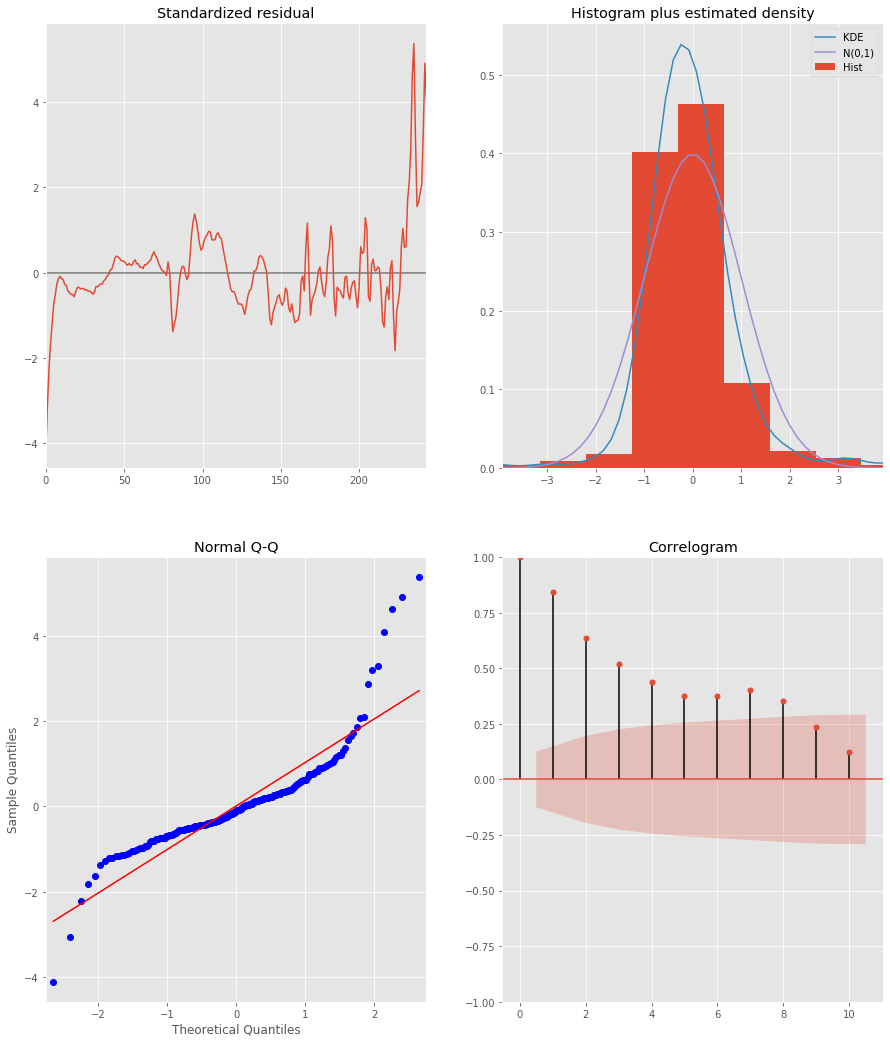

In [122]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

Not a great fit. Try the manual model (1, 1, 1)

In [123]:
uptown_arima = sm.tsa.ARIMA(uptown_train, order=[1,1,1])
output = uptown_arima.fit()

print(output.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1873.9119    758.084      2.472      0.014     388.094    3359.730
ar.L1.D.70115     0.8836      0.033     26.937      0.000       0.819       0.948
ma.L1.D.70115     0.7953      0.037     21.375      0.000       0.722       0.868


In [132]:
import statsmodels
statsmodels.__version__

'0.10.1'

In [138]:

output.plot_diagnostics(figsize=(15, 18))
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'